In [1]:
from PMF.ProbabilisticMatrixFactorization import PMF
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'data\ml-latest-small\ml-latest-small\ratings.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
triain, test = train_test_split(data, test_size=0.2, random_state=42)

In [4]:
params = {
    "num_feat": 50, 
    "epsilon": 1, 
    "_lambda": 0.1, 
    "momentum": 0.8, 
    "maxepoch": 100, 
    "num_batches": 100,
    "batch_size": 1000
}
pmf = PMF()
pmf.set_params(parameters=params)

In [5]:
pmf.fit(triain.values, test.values)

Epoch 1 | Training RMSE: 1.0615111379465618 , Test RMSE 1.0499163384263928
Epoch 2 | Training RMSE: 1.0530108561560145 , Test RMSE 1.0487477868841855
Epoch 3 | Training RMSE: 1.0422995792819554 , Test RMSE 1.0457076473708038
Epoch 4 | Training RMSE: 1.0248268335262107 , Test RMSE 1.0378963764488807
Epoch 5 | Training RMSE: 0.995529679681223 , Test RMSE 1.0218880713324228
Epoch 6 | Training RMSE: 0.9555862360984876 , Test RMSE 0.9993053234611178
Epoch 7 | Training RMSE: 0.9128204705329458 , Test RMSE 0.9770021409232609
Epoch 8 | Training RMSE: 0.8731241050915467 , Test RMSE 0.9589967646659731
Epoch 9 | Training RMSE: 0.8372482830736347 , Test RMSE 0.94486622848739
Epoch 10 | Training RMSE: 0.8068134164585767 , Test RMSE 0.9347181176504848
Epoch 11 | Training RMSE: 0.7790954855386765 , Test RMSE 0.9268121565139049
Epoch 12 | Training RMSE: 0.7539076662744216 , Test RMSE 0.9209270613148355
Epoch 13 | Training RMSE: 0.7302560844898386 , Test RMSE 0.9161971699311872
Epoch 14 | Training RMSE

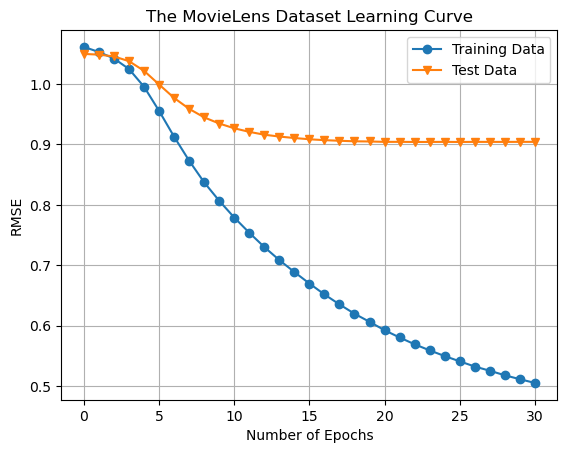

In [6]:
# Check performance by plotting train and test errors
plt.plot(range(pmf.epoch), pmf.rmse_train, marker='o', label='Training Data')
plt.plot(range(pmf.epoch), pmf.rmse_test, marker='v', label='Test Data')
plt.title('The MovieLens Dataset Learning Curve')
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()


## Evaluation

In [8]:
unique_users = data['userId'].unique()
prediction = {}
for user in unique_users:
    prediction[user] = pmf.predict(user)
y_pred = test.apply(lambda x: prediction[x.iloc[0]][int(x.iloc[1])], axis=1)
y_true = test['rating']

### Rating Prediction Metrics

In [9]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
rmse = root_mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print(f'RMSE: {rmse:.4f} | MAE: {mae:.4f}')

RMSE: 0.9043 | MAE: 0.6915


### Ranking Metrics

#### Precision & Recall

In [10]:
k_values = [1, 5, 10, 20, 50, 100]
performances = pd.DataFrame(columns=['Precision', 'Recall'], index=k_values)
for k in k_values:
    performances.loc[k] = pmf.topK(test.values, k=k)
print(performances)

    Precision    Recall
1    0.031148  0.001687
5    0.033443  0.009497
10   0.033443  0.019987
20   0.031066   0.03664
50   0.026098  0.070881
100   0.02159  0.109157


In [11]:
pmf.save_model('model/pmf_model.npz')